In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten ,Dense , MaxPooling2D ,Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Input , Activation , Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam , Adagrad , Adadelta , Adamax ,RMSprop

## data extraction

In [2]:
import os
link = "C:\\Users\\SASIDHAR\\Desktop\\Gender_age\\UTKFace"
file = os.listdir(link)

In [3]:
ages =[]
genders = []
images = []

for item in file :
    age = int(item.split('_')[0])
    gender = int(item.split('_')[1])
    sum = link+'\\'+item
    print(sum)
    img = cv2.imread(sum)
    
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB )
    img = cv2.resize(img , (48,48))
    
    images.append(img)
    
    
    

C:\Users\SASIDHAR\Desktop\Gender_age\UTKFace\100_0_0_20170112213500903.jpg.chip.jpg
C:\Users\SASIDHAR\Desktop\Gender_age\UTKFace\100_0_0_20170112215240346.jpg.chip.jpg
C:\Users\SASIDHAR\Desktop\Gender_age\UTKFace\100_1_0_20170110183726390.jpg.chip.jpg
C:\Users\SASIDHAR\Desktop\Gender_age\UTKFace\100_1_0_20170112213001988.jpg.chip.jpg
C:\Users\SASIDHAR\Desktop\Gender_age\UTKFace\100_1_0_20170112213303693.jpg.chip.jpg
C:\Users\SASIDHAR\Desktop\Gender_age\UTKFace\100_1_0_20170112215032192.jpg.chip.jpg
C:\Users\SASIDHAR\Desktop\Gender_age\UTKFace\100_1_0_20170117195420803.jpg.chip.jpg
C:\Users\SASIDHAR\Desktop\Gender_age\UTKFace\100_1_0_20170119212053665.jpg.chip.jpg
C:\Users\SASIDHAR\Desktop\Gender_age\UTKFace\100_1_2_20170105174847679.jpg.chip.jpg
C:\Users\SASIDHAR\Desktop\Gender_age\UTKFace\100_1_2_20170112213615815.jpg.chip.jpg
C:\Users\SASIDHAR\Desktop\Gender_age\UTKFace\100_1_2_20170112222336458.jpg.chip.jpg
C:\Users\SASIDHAR\Desktop\Gender_age\UTKFace\101_0_0_20170112213500903.jpg.c

In [4]:

for item in file :
    age = int(item.split('_')[0])
    gender = int(item.split('_')[1])
    
    ages.append(age)
    genders.append(gender)
    

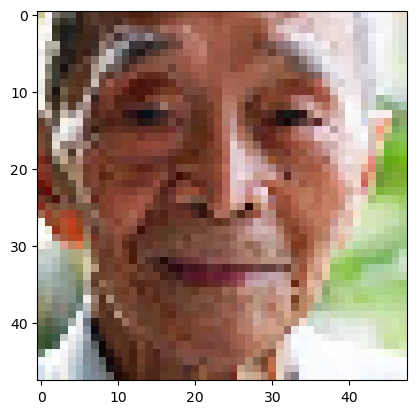

In [5]:

plt.imshow(images[13])

In [6]:

images_upd=np.array(images)
ages_upd=np.array(ages)
genders_upd=np.array(genders)



In [7]:

np.save(link+'images.npy' , images_upd)
np.save(link+'ages.npy' , ages_upd)
np.save(link + 'genders.npy' , genders_upd)

## plotting samples

In [8]:
values , counts = np.unique(genders_upd , return_counts = True )
print(counts)

[12391 11317]


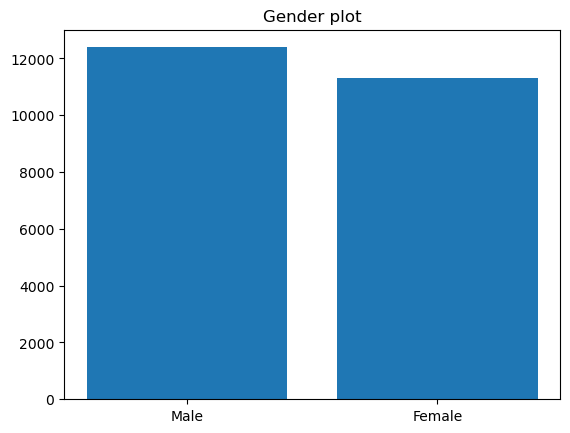

In [9]:
plt.title('Gender plot')
gender =['Male' , 'Female']
values = [12391,11317]
plt.bar(gender, values)
plt.show()


In [10]:
values , counts = np.unique(ages_upd, return_counts = True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [11]:
val = values.tolist()
cnt = counts.tolist()

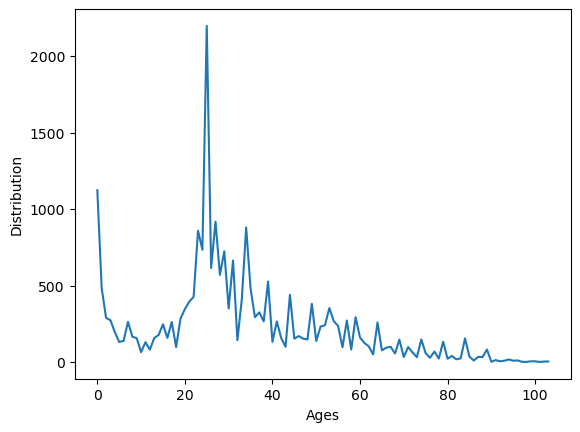

In [12]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

## splittng data

In [13]:
l = []
i = 0
while i < len(ages):
    l1 = []
    l1.append(ages[i])
    l1.append(genders[i])
    l.append(l1)
    i = i+1

In [14]:
images_upd_new = images_upd / 255
images_upd_new.shape

(23708, 48, 48, 3)

In [15]:
labels_upd = np.array(l)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test =  train_test_split(images_upd_new , labels_upd , test_size = 0.25 )

In [18]:
Y_train[0:5]

array([[21,  1],
       [33,  0],
       [ 9,  0],
       [42,  0],
       [25,  1]])

In [19]:
Y_train2 =[Y_train[:,1] , Y_train[:,0]]

Y_test2 = [Y_test[:,1] , Y_test[: , 0]]


## MODEL CREATION

In [ ]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.regularizers import l2

cnn = models.Sequential([
    layers.InputLayer((48, 48, 3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001), activation='relu'),
    layers.Dropout(0.1),
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001), activation='relu'),
    layers.Dropout(0.1),
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001), activation='relu'),
    layers.Dropout(0.1),
    layers.MaxPooling2D((2, 2)),  
    layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001), activation='relu'),
    layers.Dropout(0.1),
    layers.MaxPooling2D((2, 2)), 
    layers.Flatten(), 
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),  
    layers.Dropout(0.2),
    layers.Dense(1, activation='relu', name='sex_out'),
    layers.Dense(32, activation='relu', name='age_out'),  # Replace 1 with the desired number of units for age prediction
])


In [ ]:
cnn.compile(optimizer = 'Adam',
           loss = {'binary_crossentropy' , 'mae'},
           metrics = ['accuracy'])

In [ ]:
cnn.summary()

In [20]:
def Convolution(input_tensor , filters):
    x = Conv2D(filters = filters ,  kernel_size=(3, 3), padding='same',strides =(1,1) ,kernel_regularizer = l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    
    return x

In [21]:
from tensorflow.keras.layers import Flatten ,Dense , MaxPooling2D ,Conv2D

def model(input_shape):
    inputs = Input((input_shape))
    conv_1 = Convolution(inputs , 32)
    maxpool_1 = MaxPooling2D(pool_size =(2,2))(conv_1)
    conv_2= Convolution(maxpool_1 , 64)
    maxpool_2 = MaxPooling2D(pool_size =(2,2))(conv_2)
    conv_3 = Convolution(maxpool_2, 128)
    maxpool_3 = MaxPooling2D(pool_size =(2,2))(conv_3)
    conv_4= Convolution(maxpool_3 , 256)
    maxpool_4 = MaxPooling2D(pool_size =(2,2))(conv_4)
    
    flat = Flatten()(maxpool_4)
    dense1 = Dense(64, activation='relu')(flat)
    dense2 = Dense(64, activation='relu')(flat)
    
    drop1 = Dropout(0.2)(dense1)
    drop2 = Dropout(0.2)(dense2)
    
    output1 = Dense(1, activation='sigmoid' , name='sex_out' )(drop1 )
    output2 = Dense(1, activation='sigmoid' , name='age_out' )(drop2 )
    
    
    model = Model(inputs =[inputs] ,outputs = [output1 , output2 ])
    model.compile(optimizer = 'Adam',
           loss = ['binary_crossentropy' , 'mae'],
           metrics = ['accuracy'])
    return model 

In [22]:
Model = model((48,48,3))


In [23]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [25]:
fle = 'C:\\Users\\SASIDHAR\\Desktop\\Gender_age\\Age_Sex_detection.h5'
checkpoint =ModelCheckpoint(fle ,monitor='val_loss', verbose = 1 ,save_best_only = True ,save_weights_only = False , mode = 'auto',save_feq ='epoch')
Early = tf.keras.callbacks.EarlyStopping(patience = 75, monitor='val_loss', restore_best_weights = 'True')
call_list = [checkpoint , Early] 

In [26]:

Hist = Model.fit(X_train , Y_train2 , batch_size = 64  , validation_data = (X_test , Y_test2) , epochs = 250 ,callbacks = call_list)

Epoch 1/250
278/278 [==============================] - ETA: 0s - loss: 32.8064 - sex_out_loss: 0.5092 - age_out_loss: 32.1867 - sex_out_accuracy: 0.7399 - age_out_accuracy: 0.0472
Epoch 1: val_loss improved from inf to 33.11764, saving model to C:\Users\SASIDHAR\Desktop\Gender_age\Age_Sex_detection.h5
278/278 [==============================] - 96s 335ms/step - loss: 32.8064 - sex_out_loss: 0.5092 - age_out_loss: 32.1867 - sex_out_accuracy: 0.7399 - age_out_accuracy: 0.0472 - val_loss: 33.1176 - val_sex_out_loss: 0.3762 - val_age_out_loss: 32.6616 - val_sex_out_accuracy: 0.8525 - val_age_out_accuracy: 0.0479
Epoch 2/250


C:\Users\SASIDHAR\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


278/278 [==============================] - ETA: 0s - loss: 32.5887 - sex_out_loss: 0.3298 - age_out_loss: 32.1841 - sex_out_accuracy: 0.8561 - age_out_accuracy: 0.0472
Epoch 2: val_loss improved from 33.11764 to 33.04466, saving model to C:\Users\SASIDHAR\Desktop\Gender_age\Age_Sex_detection.h5
278/278 [==============================] - 94s 339ms/step - loss: 32.5887 - sex_out_loss: 0.3298 - age_out_loss: 32.1841 - sex_out_accuracy: 0.8561 - age_out_accuracy: 0.0472 - val_loss: 33.0447 - val_sex_out_loss: 0.3134 - val_age_out_loss: 32.6615 - val_sex_out_accuracy: 0.8691 - val_age_out_accuracy: 0.0479
Epoch 3/250
278/278 [==============================] - ETA: 0s - loss: 32.5481 - sex_out_loss: 0.2954 - age_out_loss: 32.1841 - sex_out_accuracy: 0.8726 - age_out_accuracy: 0.0472
Epoch 3: val_loss improved from 33.04466 to 33.04133, saving model to C:\Users\SASIDHAR\Desktop\Gender_age\Age_Sex_detection.h5
278/278 [==============================] - 90s 323ms/step - loss: 32.5481 - sex_out_

## Model Evaluation

In [27]:
Model.evaluate(X_test ,Y_test2)

186/186 [==============================] - 4s 24ms/step - loss: 32.9614 - sex_out_loss: 0.2295 - age_out_loss: 32.6615 - sex_out_accuracy: 0.9074 - age_out_accuracy: 0.0479


[32.9614372253418,
 0.2295396775007248,
 32.66154861450195,
 0.9073730111122131,
 0.047916315495967865]

In [28]:
pred = Model.predict(X_test)

186/186 [==============================] - 5s 24ms/step


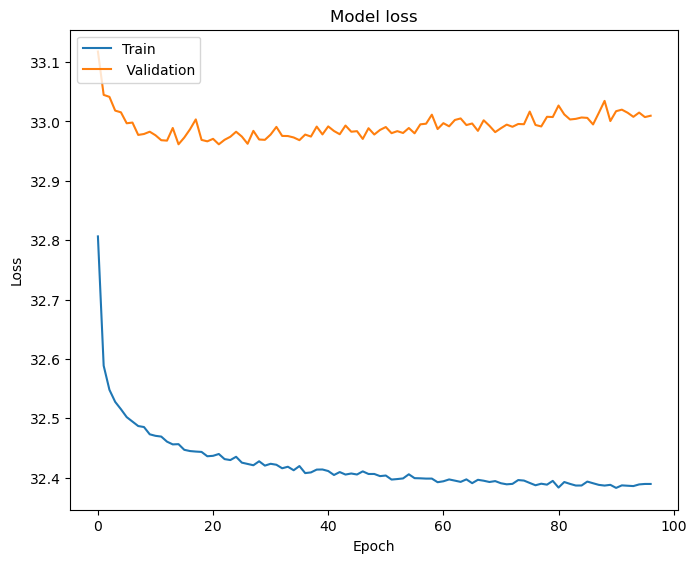

In [29]:
plt.plot(Hist.history['loss'])
plt.plot(Hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train' ,' Validation'] , loc = 'upper left')
plt.subplots_adjust(top = 1.0 , bottom = 0.0 , right = 0.95 ,left = 0 , hspace = 0.25 ,wspace = 0.35 )


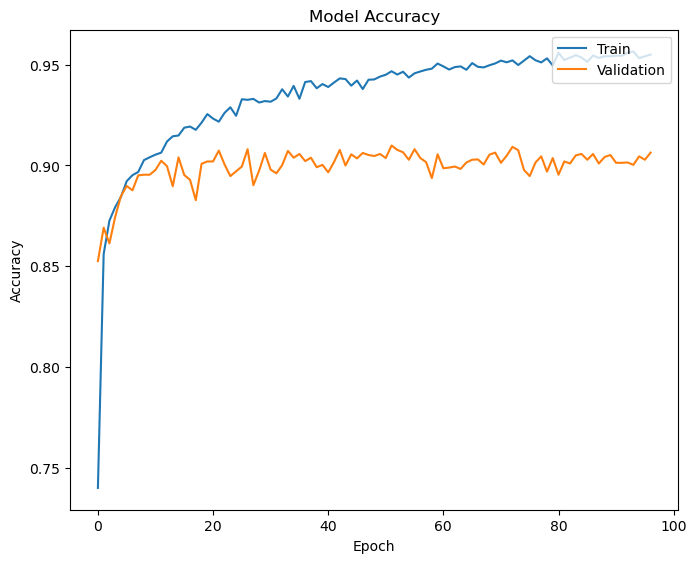

In [30]:
plt.plot(Hist.history['sex_out_accuracy'])
plt.plot(Hist.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train' ,'Validation'] , loc = 'upper right')
plt.subplots_adjust(top = 1.0 , bottom = 0.0 , right = 0.95 ,left = 0 , hspace = 0.25 ,wspace = 0.35 )

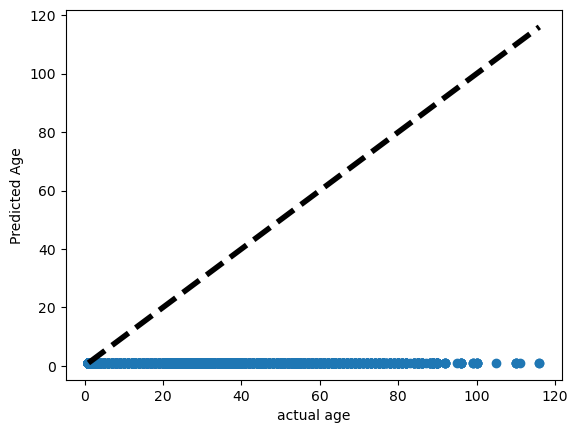

In [31]:
fig , ax = plt.subplots()
ax.scatter(Y_test2[1] ,pred[1])
ax.plot([Y_test2[1].min() , Y_test2[1].max()] , [Y_test2[1].min() , Y_test2[1].max()] , 'k--' ,lw =4)
ax.set_xlabel('actual age')
ax.set_ylabel('Predicted Age')
plt.show()


## Model Report

In [32]:
i =0
Pred_l = []
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i = i+1
    

In [33]:
from sklearn.metrics import confusion_matrix , classification_report

report = classification_report(Y_test2[0] , Pred_l)

In [34]:
print(report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3075
           1       0.91      0.90      0.90      2852

    accuracy                           0.91      5927
   macro avg       0.91      0.91      0.91      5927
weighted avg       0.91      0.91      0.91      5927



In [35]:
con = confusion_matrix(Y_test2[0][:] , Pred_l)

In [36]:
print(con)

[[2810  265]
 [ 284 2568]]


<Axes: >

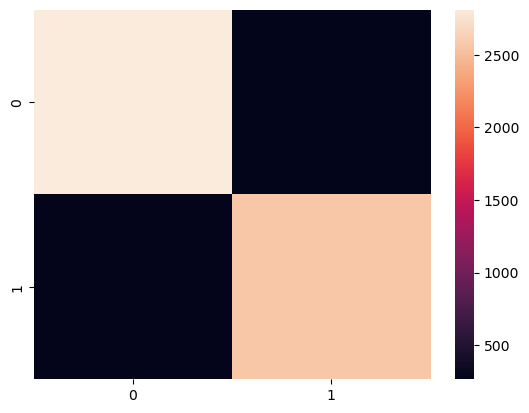

In [37]:
import seaborn as sns
sns.heatmap(con)

## Test function

In [76]:
def test_image(ind,images_upd,images_upd_new,Model):
    plt.imshow(images_upd[ind])
    image_test=images_upd_new[ind]
    pred_l = Model.predict(np.array([image_test]))
    sex_upd=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(pred_l[0]))
    print("Predicted Gender is "+ sex_upd[sex])
    
   
    

1/1 [==============================] - 0s 32ms/step
Predicted Age is [[0.20043842]]
Predicted Gender is Male


array([[0.20043842]], dtype=float32)

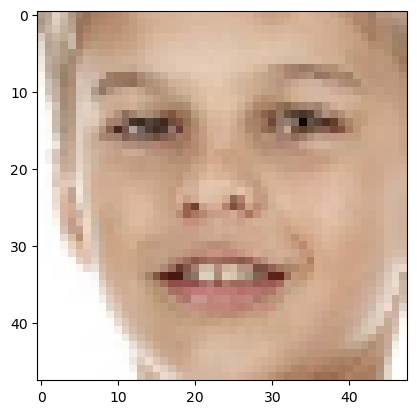

In [86]:
test_image( 46 , images_upd ,images_upd_new , Model)

1/1 [==============================] - 0s 33ms/step
Predicted Age is [[0.1180638]]
Predicted Gender is Male


array([[0.1180638]], dtype=float32)

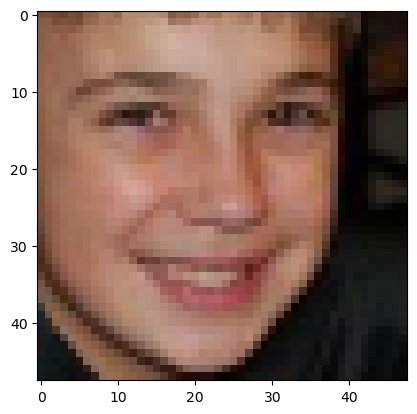

In [87]:
test_image( 400 , images_upd ,images_upd_new , Model)

1/1 [==============================] - 0s 32ms/step
Predicted Age is [[0.13389096]]
Predicted Gender is Male


array([[0.13389096]], dtype=float32)

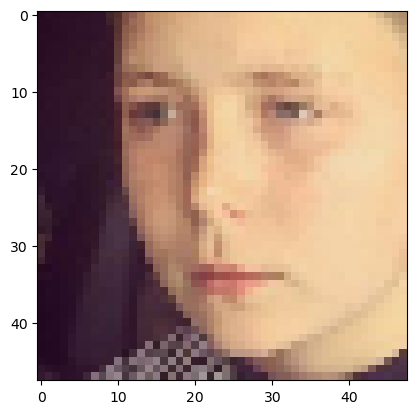

In [88]:
test_image( 480 , images_upd ,images_upd_new , Model)

1/1 [==============================] - 0s 24ms/step
Predicted Age is [[0.02405581]]
Predicted Gender is Male


array([[0.02405581]], dtype=float32)

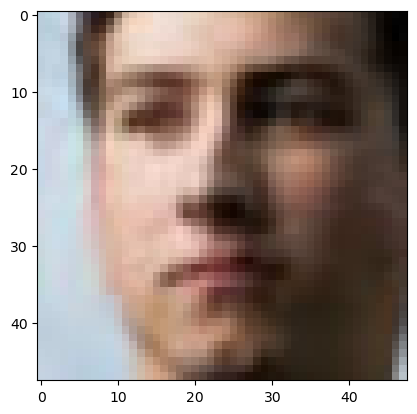

In [89]:
test_image( 1470 , images_upd ,images_upd_new , Model)

1/1 [==============================] - 0s 32ms/step
Predicted Age is [[0.01936341]]
Predicted Gender is Male


array([[0.01936341]], dtype=float32)

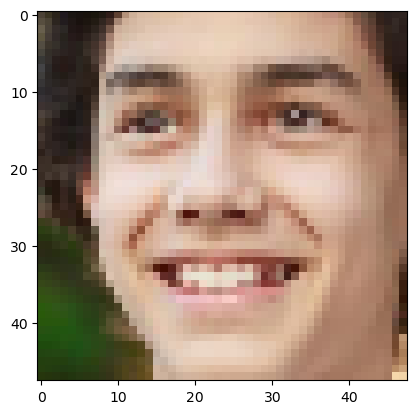

In [90]:
test_image( 100 , images_upd ,images_upd_new , Model)

1/1 [==============================] - 0s 33ms/step
Predicted Age is [[0.88114387]]
Predicted Gender is Female


array([[0.88114387]], dtype=float32)

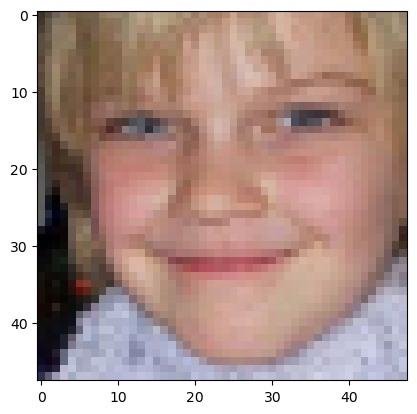

In [92]:
test_image( 234 , images_upd ,images_upd_new , Model)

1/1 [==============================] - 0s 32ms/step
Predicted Age is [[0.2102034]]
Predicted Gender is Male


array([[0.2102034]], dtype=float32)

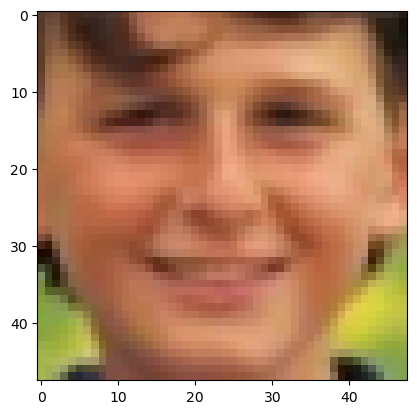

In [93]:
test_image( 34 , images_upd ,images_upd_new , Model)

1/1 [==============================] - 0s 33ms/step
Predicted Age is [[0.9085883]]
Predicted Gender is Female


array([[0.9085883]], dtype=float32)

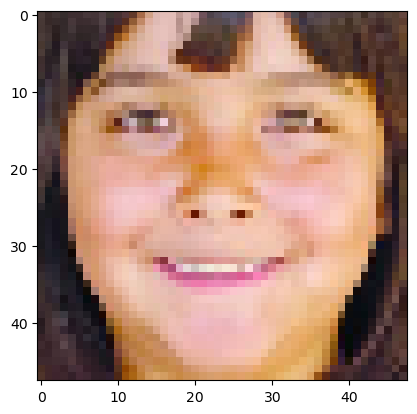

In [80]:
test_image( 300, images_upd ,images_upd_new , Model)